# Importing Neccessary Libraries for performing the EDA and Feature Engineering

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the Data to jupyter notebook

In [171]:
data = pd.read_csv(r"D:\Shalini Work\Datasets\Dataset\data5\Visadataset.csv")

# Fetching 5 records from top

In [172]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# fetching bottom 5 records 

In [173]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


# Total numbers of rows and columns

In [174]:
data.shape

(25480, 12)

# Memory Occupied by the Dataset

In [175]:
data.memory_usage()

Index                       128
case_id                  203840
continent                203840
education_of_employee    203840
has_job_experience       203840
requires_job_training    203840
no_of_employees          203840
yr_of_estab              203840
region_of_employment     203840
prevailing_wage          203840
unit_of_wage             203840
full_time_position       203840
case_status              203840
dtype: int64

# Fetching all the column

In [176]:
data.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

# fetching information regarding the data

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# fetching non numeric columns from dataset

In [178]:
Cat_features= [feature for feature in data.columns if data[feature].dtype == 'O']
Cat_features

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

# fetching numeric columns from dataset

In [179]:
Numeric_Feature = [feature for feature in data.columns if data[feature].dtype != 'O']
Numeric_Feature

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

# Checking Missing Value for each column

In [180]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

# Checking Duplicate Value for each column

In [181]:
data.duplicated().sum()

0

# Checking Unique Values for each column

In [182]:
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

# Checking Unique Value for Categorical Columns

In [183]:
data['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [184]:
data['education_of_employee'].unique()

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)

In [185]:
data['has_job_experience'].unique()

array(['N', 'Y'], dtype=object)

In [186]:
data['requires_job_training'].unique()

array(['N', 'Y'], dtype=object)

In [187]:
data['region_of_employment'].unique()

array(['West', 'Northeast', 'South', 'Midwest', 'Island'], dtype=object)

In [188]:
data['unit_of_wage'].unique()

array(['Hour', 'Year', 'Week', 'Month'], dtype=object)

In [189]:
data['full_time_position'].unique()

array(['Y', 'N'], dtype=object)

In [190]:
data['case_status'].unique()

array(['Denied', 'Certified'], dtype=object)

# Checking Correlation b/w numeric values

In [191]:
data.corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


HeatMap graph to visualize the correlation

<AxesSubplot:>

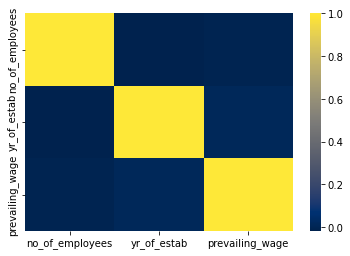

In [192]:
sns.heatmap(data.corr(), cmap='cividis')

# 5 point summary for numeric values

In [193]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# Checking values for unit of wages to convert them into single uom

In [194]:
data['unit_of_wage'].value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

# Adjusting the prevailing wages to yearly amount and dropping the unit of wage column

In [195]:
Month_Index = data.loc[data['unit_of_wage'] == 'Month', 'prevailing_wage'].index
Week_Index = data.loc[data['unit_of_wage'] == 'Week', 'prevailing_wage'].index
Hour_Index = data.loc[data['unit_of_wage'] == 'Hour', 'prevailing_wage'].index

In [196]:
data.loc[Month_Index.to_list(), 'prevailing_wage'] = data.loc[Month_Index.to_list(), 'prevailing_wage']*12

In [197]:
data.loc[Week_Index.to_list(), 'prevailing_wage'] = data.loc[Week_Index.to_list(), 'prevailing_wage']*52
data.loc[Hour_Index.to_list(), 'prevailing_wage'] = data.loc[Hour_Index.to_list(), 'prevailing_wage']*52*8

In [198]:
data.drop(columns= ['unit_of_wage'], inplace= True)

# Dropping Case_Id as it has no relevance

In [200]:
data.drop(columns = ['case_id'], inplace = True)

# Data after alterations

In [201]:
data

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,246356.4064,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Y,Certified
...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Y,Certified


# Distribution of Prevailing Wages

<AxesSubplot:xlabel='prevailing_wage', ylabel='Density'>

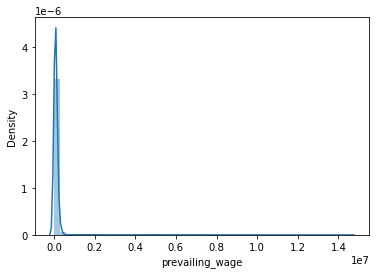

In [202]:
sns.distplot(data['prevailing_wage'])

# Conclusion : Data is right skewed.

In [203]:
data.skew()

no_of_employees    12.265260
yr_of_estab        -2.037301
prevailing_wage    12.290191
dtype: float64

# Representing outliers by box plot

<AxesSubplot:xlabel='prevailing_wage'>

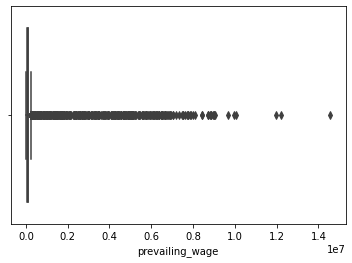

In [204]:
sns.boxplot(x= data['prevailing_wage'])

<AxesSubplot:xlabel='prevailing_wage'>

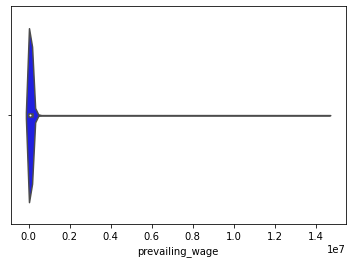

In [206]:
sns.violinplot(x=data['prevailing_wage'], color =  "blue")

# Conclusion : The wage distribution has significant range and its mean is highly affected by outliers. Hence there are couple of outliers in the given feature.

# Univariate Analysis

# Count-plot for Continents

<AxesSubplot:xlabel='continent', ylabel='count'>

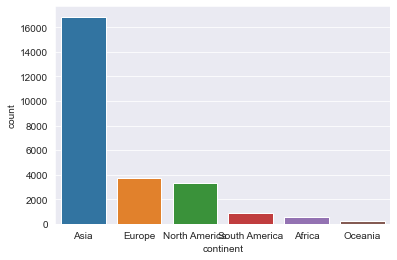

In [232]:
sns.set_style('darkgrid')
sns.countplot(x = 'continent', data = data,  order = data['continent'].value_counts().index,)

# Conclusion: Most of the person who applied for visa belongs to Asia followed by Europe and North America

# Count Plot for Employee Education

<AxesSubplot:xlabel='education_of_employee', ylabel='count'>

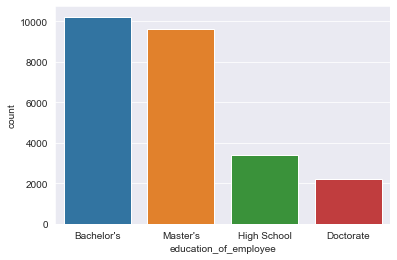

In [233]:
sns.set_style('darkgrid')
sns.countplot(x = 'education_of_employee', data = data,  order = data['education_of_employee'].value_counts().index,)

# Conclusion: Most of the visa appliers has education as bachelor's followed by Master's

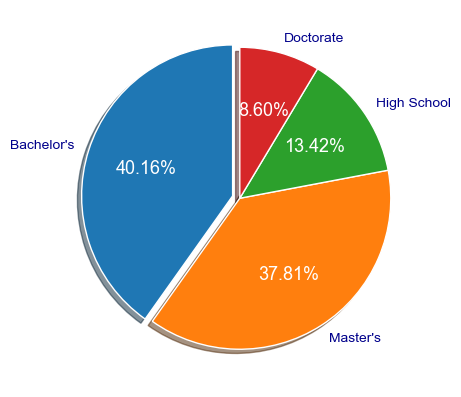

In [260]:
values = data['education_of_employee'].value_counts()
labels = ["Bachelor's", "Master's", "High School", "Doctorate"]
explode = (0.05, 0, 0, 0)

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'DarkBlue')
plt.setp(autotexts, size = 13, color = 'white')
plt.show()

<AxesSubplot:xlabel='requires_job_training', ylabel='count'>

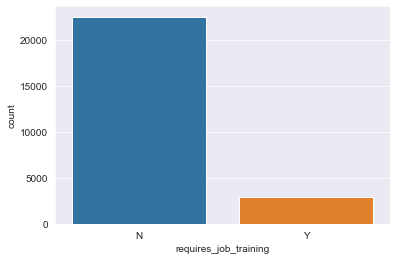

In [227]:
sns.set_style('darkgrid')
sns.countplot(x = 'requires_job_training', data = data,  order = data['requires_job_training'].value_counts().index)

# Conclusion : Most of the visa appliers doesn't require the job trailning

In [230]:
data['requires_job_training'].value_counts(normalize = True)

N    0.884027
Y    0.115973
Name: requires_job_training, dtype: float64

# Conclusion: 88.4% of appliers doesn't require any job training

<AxesSubplot:xlabel='region_of_employment', ylabel='count'>

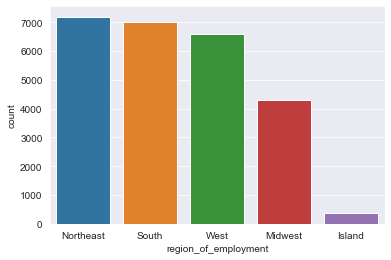

In [234]:
sns.set_style('darkgrid')
sns.countplot(x = 'region_of_employment', data = data,  order = data['region_of_employment'].value_counts().index)

# Conclustion : North east has most employement followed by south

<AxesSubplot:xlabel='full_time_position', ylabel='count'>

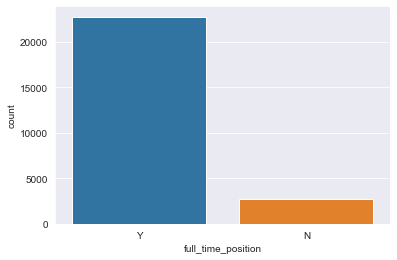

In [236]:
sns.set_style('darkgrid')
sns.countplot(x = 'full_time_position', data = data,  order = data['full_time_position'].value_counts().index)

# Conclusion : Most of the visa candidates has full time job position

In [245]:
data.case_status.value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

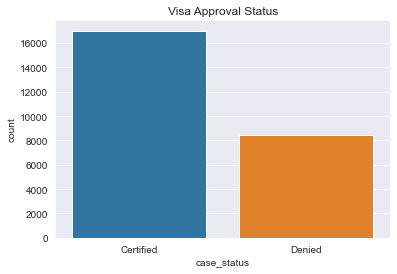

In [241]:
sns.set_style('darkgrid')
sns.countplot(x = 'case_status', data = data,  order = data['case_status'].value_counts().index)
plt.title("Visa Approval Status")
plt.show()

# Conclusion: Around 16K+ candidates got visa approved and 8K+ got rejected

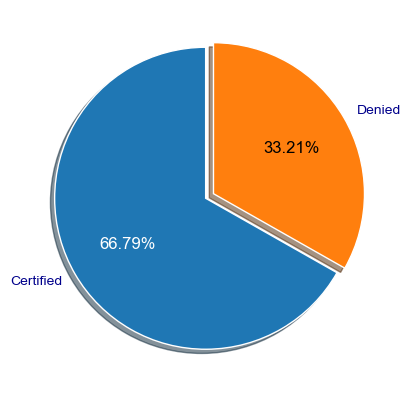

In [244]:
values = data['case_status'].value_counts()
labels = ['Certified', 'Denied']

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'DarkBlue')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

# Bivariate Analysis

In [246]:
data.groupby(['education_of_employee', 'case_status'])['case_status'].count()

education_of_employee  case_status
Bachelor's             Certified      6367
                       Denied         3867
Doctorate              Certified      1912
                       Denied          280
High School            Certified      1164
                       Denied         2256
Master's               Certified      7575
                       Denied         2059
Name: case_status, dtype: int64

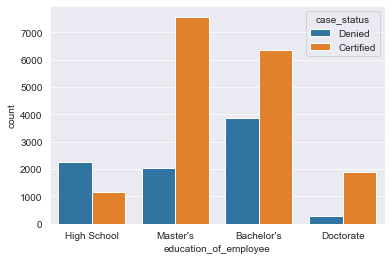

In [249]:
sns.countplot(x = 'education_of_employee', data = data, hue = 'case_status' )
plt.show()

# Conclusion : The candidate who has Master's Degree has greater chances of Visa being approved

In [261]:
data.groupby(['has_job_experience', 'case_status'])['case_status'].count()

has_job_experience  case_status
N                   Certified       5994
                    Denied          4684
Y                   Certified      11024
                    Denied          3778
Name: case_status, dtype: int64

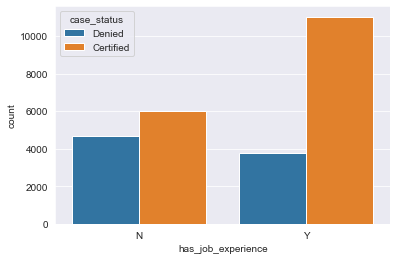

In [262]:
sns.countplot(x = 'has_job_experience', data = data, hue = 'case_status' )
plt.show()

# Conclusion : The candidate who has JOB Experience has greater chances of Visa being approved

In [263]:
data.groupby(['requires_job_training', 'case_status'])['case_status'].count()

requires_job_training  case_status
N                      Certified      15012
                       Denied          7513
Y                      Certified       2006
                       Denied           949
Name: case_status, dtype: int64

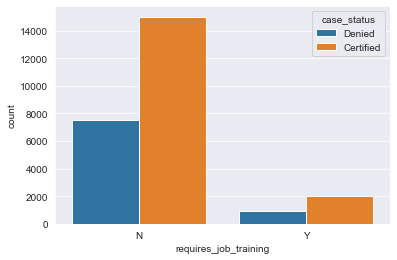

In [264]:
sns.countplot(x = 'requires_job_training', data = data, hue = 'case_status' )
plt.show()

# Conclusion : The candidate who requires no job training has greater chances of Visa being approved.

In [265]:
data.groupby(['full_time_position', 'case_status'])['case_status'].count()

full_time_position  case_status
N                   Certified       1855
                    Denied           852
Y                   Certified      15163
                    Denied          7610
Name: case_status, dtype: int64

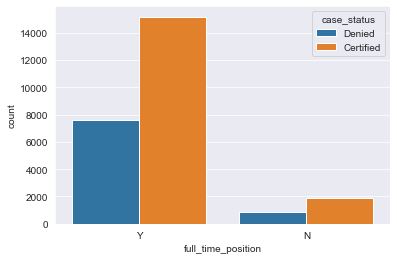

In [266]:
sns.countplot(x = 'full_time_position', data = data, hue = 'case_status')
plt.show()

# Conclusion : The candidate who has full time position has greater chances of Visa being approved.

# Average Wage of Applicants with education degree

<AxesSubplot:xlabel='education_of_employee', ylabel='prevailing_wage'>

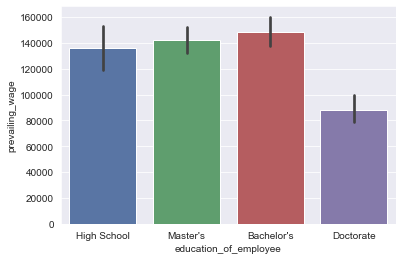

In [269]:
sns.set_style('darkgrid')
sns.barplot(y='prevailing_wage',x = 'education_of_employee', data=data)

In [271]:
data.groupby(['education_of_employee'])['prevailing_wage'].mean()

education_of_employee
Bachelor's     148247.091435
Doctorate       87824.167726
High School    135691.075141
Master's       141975.863095
Name: prevailing_wage, dtype: float64

# Conclusion: Applicants with bachelor's degree seems to perform better in terms of compensation compared to applicants with other highest education degree.

<AxesSubplot:xlabel='has_job_experience', ylabel='prevailing_wage'>

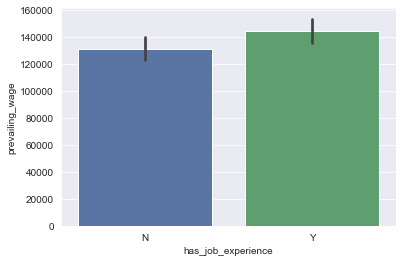

In [272]:
sns.set_style('darkgrid')
sns.barplot(y='prevailing_wage',x = 'has_job_experience', data=data)

In [287]:
data.groupby(['has_job_experience'])['prevailing_wage'].mean()

has_job_experience
N    131159.091954
Y    144643.525709
Name: prevailing_wage, dtype: float64

# Conclusion: Number of Applicants with prior job experience has on an average higher monetary compensation.

# Region of employment and no. of emplyees present there in respective continents

<AxesSubplot:xlabel='continent', ylabel='no_of_employees'>

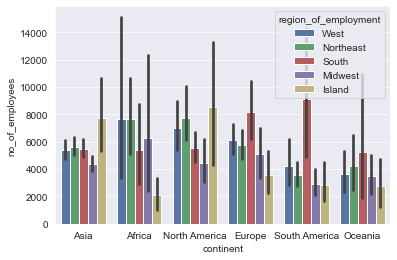

In [289]:
sns.set_style('darkgrid')
sns.barplot(y='no_of_employees',x='continent', hue='region_of_employment', data=data)

# Educational Qualification and region of employment of applicants

<AxesSubplot:xlabel='education_of_employee', ylabel='count'>

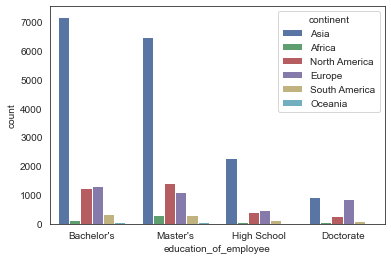

In [291]:
sns.set_style('white')
sns.countplot(x = 'education_of_employee', hue = 'continent', data = data, order = data['education_of_employee'].value_counts().index)

# Conclusion: Most of the students are moving to Asia and north Europe

# Visa-status per Continent

<AxesSubplot:xlabel='continent', ylabel='count'>

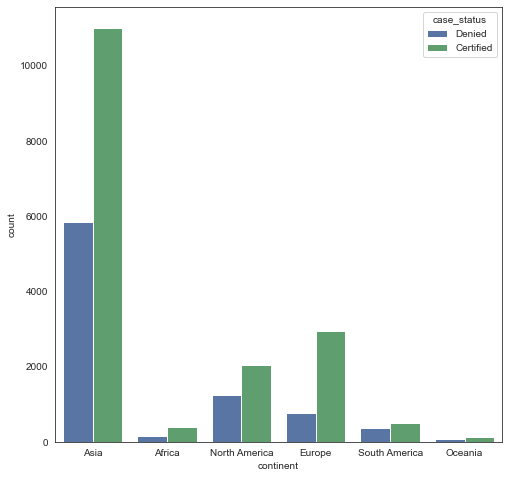

In [292]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data, x='continent', hue='case_status', )

In [275]:
data.groupby(['has_job_experience', 'requires_job_training', 'full_time_position'])['prevailing_wage'].mean()

has_job_experience  requires_job_training  full_time_position
N                   N                      N                     131189.629229
                                           Y                     139533.240834
                    Y                      N                     103328.942333
                                           Y                      92688.857174
Y                   N                      N                     128924.273705
                                           Y                     151695.180158
                    Y                      N                      97794.205238
                                           Y                      94124.537375
Name: prevailing_wage, dtype: float64

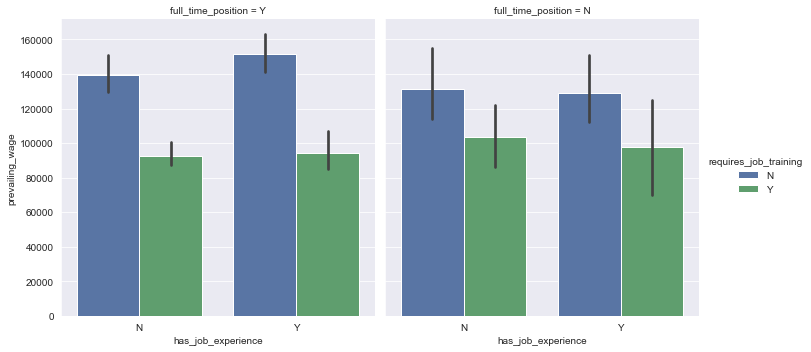

In [278]:
sns.set_style('darkgrid')
sns.factorplot(y='prevailing_wage',x = 'has_job_experience', hue = 'requires_job_training', col = 'full_time_position', data=data, kind = "bar")

# Conclusion: The candidates who have job experience and full time position and requires no job training seems to perform better in terms of compensation